## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load data and view random samples from the dataset
data  = pd.read_csv('Hotel Bookings.csv')
data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13887,Resort Hotel,0,0,2016,November,47,18,0,2,2,...,No Deposit,NaN,NaN,0,Transient,60.00,1,3,Check-Out,2016-11-20
29529,Resort Hotel,0,28,2016,October,44,27,0,3,2,...,No Deposit,241.0,NaN,0,Transient,51.20,0,1,Check-Out,2016-10-30
103962,City Hotel,0,61,2016,December,53,29,2,3,3,...,No Deposit,14.0,NaN,0,Transient,255.48,1,1,Check-Out,2017-01-03
111689,City Hotel,0,330,2017,May,19,11,0,3,2,...,No Deposit,9.0,NaN,0,Transient,109.80,0,3,Check-Out,2017-05-14
19127,Resort Hotel,0,11,2015,December,49,5,2,1,2,...,No Deposit,350.0,NaN,0,Transient-Party,68.00,0,0,Check-Out,2015-12-08
34157,Resort Hotel,0,5,2017,March,11,12,2,1,1,...,No Deposit,240.0,NaN,0,Transient,60.00,0,1,Check-Out,2017-03-15
109052,City Hotel,0,91,2017,April,14,2,2,2,2,...,No Deposit,9.0,NaN,0,Transient,117.00,0,4,Check-Out,2017-04-06
63056,City Hotel,1,145,2017,January,4,28,0,1,2,...,No Deposit,9.0,NaN,0,Transient,93.60,0,2,Canceled,2016-09-15
17538,Resort Hotel,0,0,2015,October,42,12,1,0,1,...,No Deposit,NaN,20.0,0,Transient,54.00,0,0,Check-Out,2015-10-13
105397,City Hotel,0,21,2017,February,6,6,1,0,1,...,No Deposit,NaN,179.0,0,Transient,80.00,0,0,Check-Out,2017-02-07


In [8]:
# Overview of features in the dataset
print(data.columns)
print("Number of Columns in the dataset: ",len(data.columns))

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Number of Columns in the dataset:  32


In [10]:
# Datatype of the columns
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [45]:
print("The dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The dataset has 119390 rows and 32 columns


In [14]:
# To better understand the insights on the numeric data lets see the
# Statistcal analysis
data.describe().T


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


* Features like agen, company, children seems to be having some missing data from their count

In [38]:
print("Is there a NaN value in the dataset: ",data.isnull().values.any())

Is there a NaN value in the dataset:  True


In [47]:
# Count of NaN in the dataset
data.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [49]:
# Percent of NaN in the dataset
data.isna().sum().sort_values(ascending=False)/ len(data)*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

* We have features like children, country, agent and company with missing values that we have confirmed from data.describe as well

In [16]:
# Display the unique number of values for each feature in the dataset
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

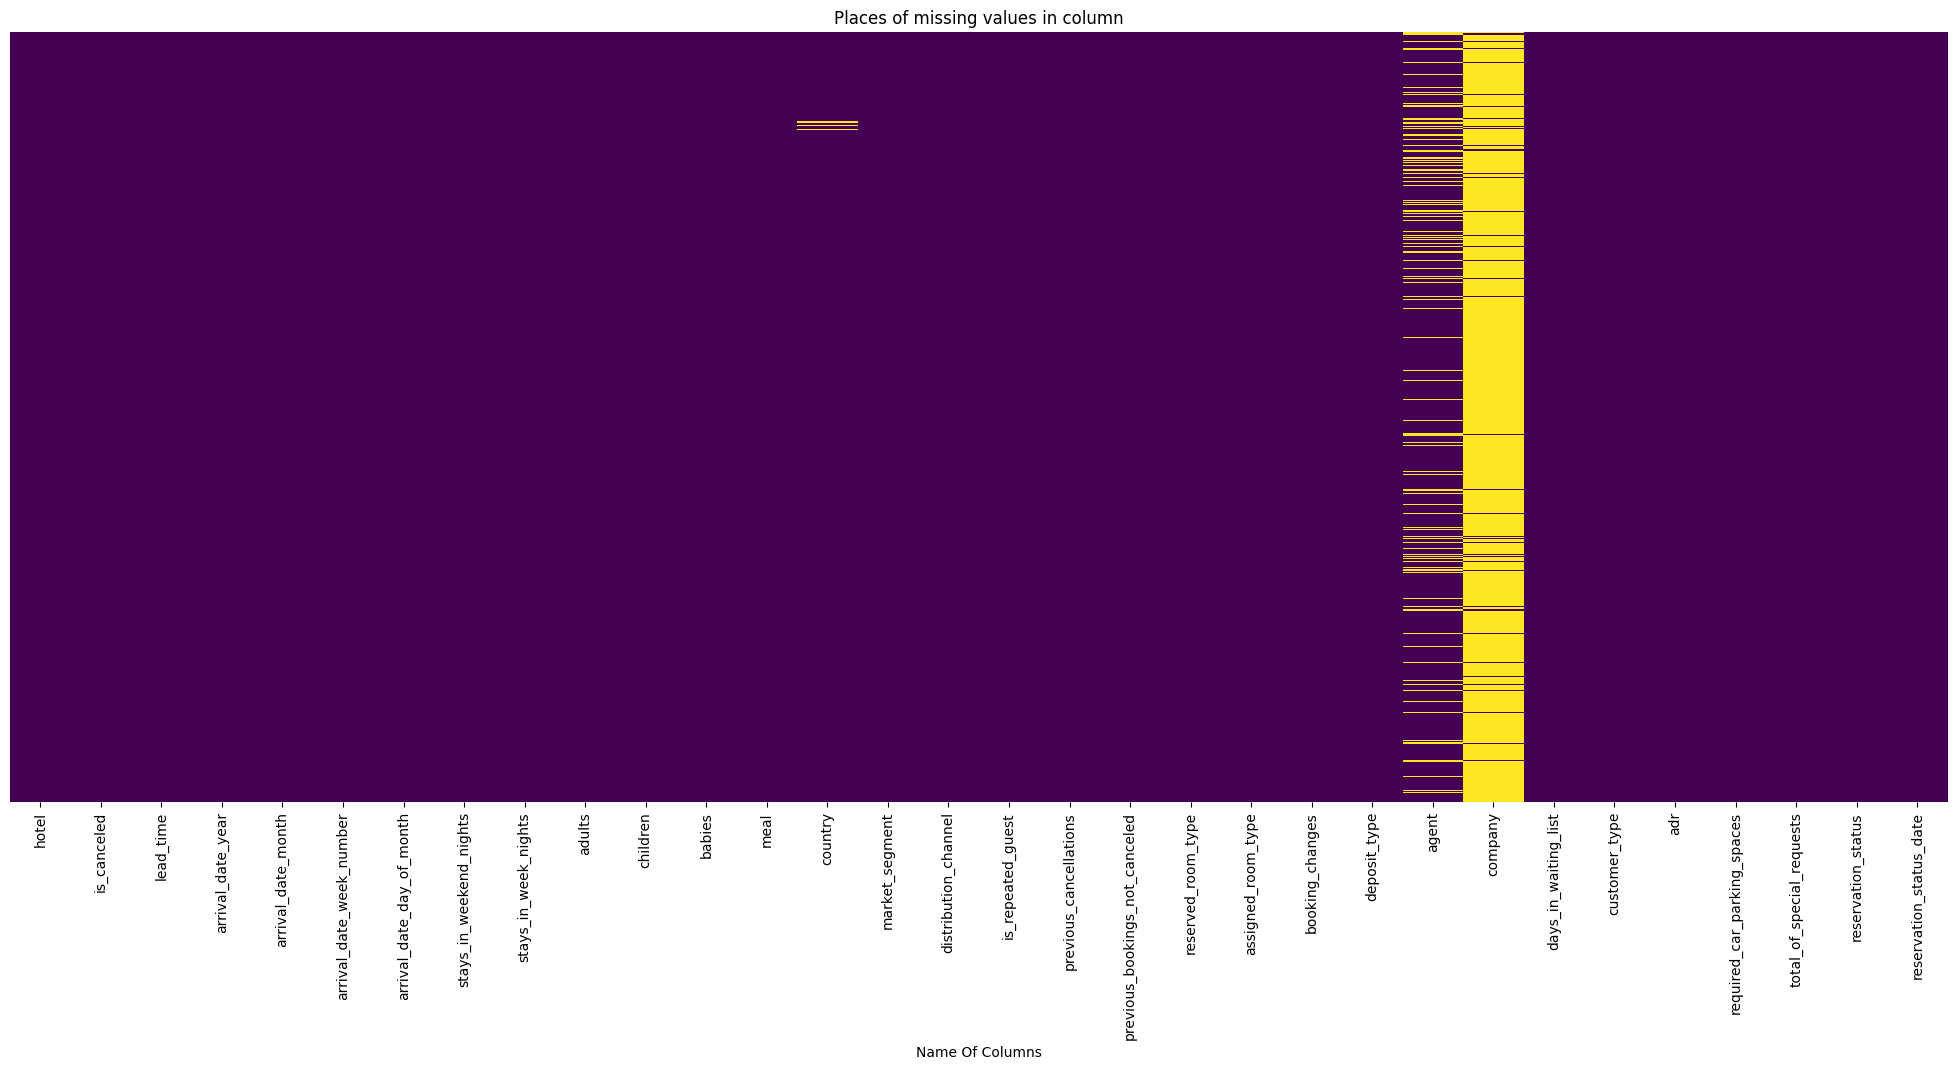

In [51]:
# handling Missing Data

plt.figure(figsize=(25,10))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap = 'viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")
plt.show()

### So we Have Null values in columns- Company, agent, Country,children.

* for company and agent we will fill the Missing values with 0
* for country we will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
* AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [59]:
# Filling the missing data with 0
null_columns = ['agent', 'company', 'children']
for columns in null_columns:
    data[columns].fillna(0, inplace=True)

In [61]:
data['country'] .fillna('others', inplace=True)

In [68]:
data[null_columns].isna().sum().sort_values(ascending=False)
data['country'].isna().sum()

0

*We have handled the missing data

In [72]:
# # droppping all those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

print(len(data[data['adults']+ data['children']+ data['babies']==0]))
data.drop(data[data['adults']+ data['children']+ data['babies']==0].index, inplace=True)

180


In [73]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(data.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(data.describe()))
for col in categorical_cols:
    print(f'Unique values in column {col} are:, {(data[col].unique())}')

Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [74]:
# lets add some new columns

data['total_people'] = data['adults'] + data['babies'] + data['children']   
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [75]:
print("The dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The dataset has 119210 rows and 34 columns


### EDA (Exploratory Data Analysis)